In [1]:
from collections import OrderedDict
from datetime import date
from dateutil.relativedelta import *

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def amortize(principal, interest_rate, years, addl_principal=0, annual_payments=12, start_date=date.today()):

    pmt = -round(np.pmt(interest_rate/annual_payments, years*annual_payments, principal), 2)
    # initialize the variables to keep track of the periods and running balances
    p = 1
    beg_balance = principal
    end_balance = principal

    while end_balance > 0:

        # Recalculate the interest based on the current balance
        interest = round(((interest_rate/annual_payments) * beg_balance), 2)

        # Determine payment based on whether or not this period will pay off the loan
        pmt = min(pmt, beg_balance + interest)
        principal = pmt - interest

        # Ensure additional payment gets adjusted if the loan is being paid off
        addl_principal = min(addl_principal, beg_balance - principal)
        end_balance = beg_balance - (principal + addl_principal)

        yield OrderedDict([('Month',start_date),
                           ('Period', p),
                           ('Begin Balance', beg_balance),
                           ('Payment', pmt),
                           ('Principal', principal),
                           ('Interest', interest),
                           ('Additional_Payment', addl_principal),
                           ('End Balance', end_balance)])

        # Increment the counter, balance and date
        p += 1
        start_date += relativedelta(months=1)
        beg_balance = end_balance

In [3]:
schedule1 = pd.DataFrame(amortize(700000, .04, 30, addl_principal=200, start_date=date(2016, 1,1)))

In [4]:
schedule1.head()

,Month,Period,Begin Balance,Payment,Principal,Interest,Additional_Payment,End Balance
0,2016-01-01,1,700000.00,3341.91,1008.58,2333.33,200.0,698791.42
1,2016-02-01,2,698791.42,3341.91,1012.61,2329.30,200.0,697578.81
2,2016-03-01,3,697578.81,3341.91,1016.65,2325.26,200.0,696362.16
3,2016-04-01,4,696362.16,3341.91,1020.70,2321.21,200.0,695141.46
4,2016-05-01,5,695141.46,3341.91,1024.77,2317.14,200.0,693916.69


In [5]:
schedule1.tail()

,Month,Period,Begin Balance,Payment,Principal,Interest,Additional_Payment,End Balance
319,2042-08-01,320,14413.65,3341.91,3293.86,48.05,200.0,10919.79
320,2042-09-01,321,10919.79,3341.91,3305.51,36.40,200.0,7414.28
321,2042-10-01,322,7414.28,3341.91,3317.20,24.71,200.0,3897.08
322,2042-11-01,323,3897.08,3341.91,3328.92,12.99,200.0,368.16
323,2042-12-01,324,368.16,369.39,368.16,1.23,0.0,0.00


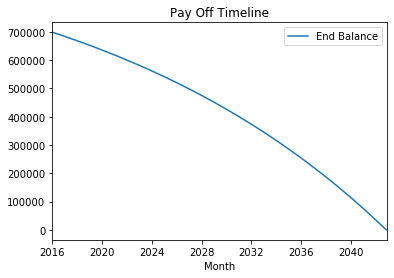

In [7]:
schedule1.plot(x='Month', y='End Balance', title="Pay Off Timeline")

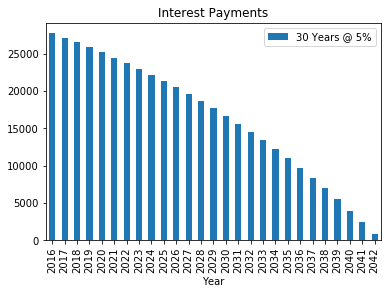

In [10]:
fig, ax = plt.subplots(1, 1)

y1_schedule = schedule1.set_index(pd.to_datetime(schedule1['Month'])).resample("A")["Interest"].sum().abs().reset_index()
y1_schedule["Year"] = y1_schedule["Month"].dt.year
y1_schedule.plot(kind="bar", x="Year", y="Interest", ax=ax, label="30 Years @ 5%")

plt.title("Interest Payments");

In [13]:
# Get the payment info into a DataFrame in column order
payment_info = (schedule1[["Payment", "Principal", "Additional_Payment", "Interest"]].sum().to_frame().T)

In [21]:
try:
    last_payment = schedule1.query(
        "int('End Balance') <= 0")["End Balance"].idxmax(axis=1, skipna=True)
except ValueError:
    last_payment = schedule1.last_valid_index()

In [22]:
last_payment

323

In [25]:
last_payment_date = "{:%m-%d-%Y}".format(
    schedule1.loc[last_payment, "Month"]
)

In [26]:
last_payment_date

'12-01-2042'

In [30]:
payment_info

,Payment,Principal,Additional_Payment,Interest
0,1079806.32,635400.0,64600.0,444406.32


In [31]:
schedule1

,Month,Period,Begin Balance,Payment,Principal,Interest,Additional_Payment,End Balance
0,2016-01-01,1,700000.00,3341.91,1008.58,2333.33,200.0,698791.42
1,2016-02-01,2,698791.42,3341.91,1012.61,2329.30,200.0,697578.81
2,2016-03-01,3,697578.81,3341.91,1016.65,2325.26,200.0,696362.16
3,2016-04-01,4,696362.16,3341.91,1020.70,2321.21,200.0,695141.46
4,2016-05-01,5,695141.46,3341.91,1024.77,2317.14,200.0,693916.69
5,2016-06-01,6,693916.69,3341.91,1028.85,2313.06,200.0,692687.84
6,2016-07-01,7,692687.84,3341.91,1032.95,2308.96,200.0,691454.89
7,2016-08-01,8,691454.89,3341.91,1037.06,2304.85,200.0,690217.83
8,2016-09-01,9,690217.83,3341.91,1041.18,2300.73,200.0,688976.65
9,2016-10-01,10,688976.65,3341.91,1045.32,2296.59,200.0,687731.33
